In [1]:
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
((x1,y1),(x2,y2))=tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
x=np.concatenate((x1,x2),axis=0)
y=np.concatenate((y1,y2),axis=0)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32')
x_train/=255
x_test/=255

In [4]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

In [5]:
labels=["aeroplane","automobile","bird","cat",
        "deer","dog","frog","horse","ship","truck"]

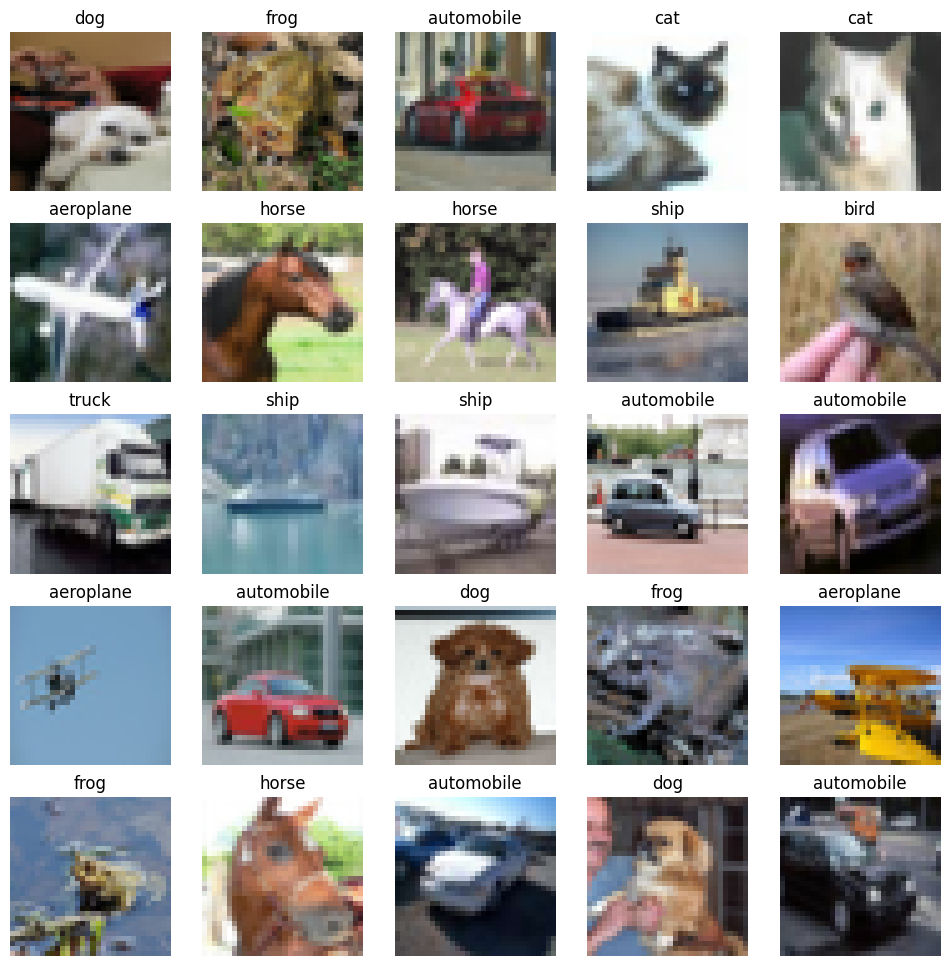

In [6]:
fig, ax = plt.subplots(5, 5,figsize=(12,12))
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        ax[i][j].set_title(labels[np.argmax(y_train[k])])
        ax[i][j].axis('off')
        k += 1
    print('\n')

plt.show()

In [7]:
model=Sequential([
    Conv2D(16,(3,3),input_shape=(32,32,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),padding='same',activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.2),
    Dense(32,activation="sigmoid"),
    Dense(10,activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [9]:
t0=time.time()
history=model.fit(x_train, y_train, epochs=100, batch_size=1000,validation_data=(x_test,y_test))
print("Training time = ",time.time()-t0)

Epoch 1/100
48/48 [==============================] - 14s 38ms/step - loss: 1.8978 - accuracy: 0.3373 - val_loss: 2.4506 - val_accuracy: 0.1027
Epoch 2/100
48/48 [==============================] - 1s 24ms/step - loss: 1.5253 - accuracy: 0.4941 - val_loss: 2.4074 - val_accuracy: 0.1034
Epoch 3/100
48/48 [==============================] - 1s 25ms/step - loss: 1.3117 - accuracy: 0.5705 - val_loss: 2.3559 - val_accuracy: 0.1217
Epoch 4/100
48/48 [==============================] - 1s 24ms/step - loss: 1.1703 - accuracy: 0.6164 - val_loss: 2.2168 - val_accuracy: 0.1847
Epoch 5/100
48/48 [==============================] - 1s 24ms/step - loss: 1.0709 - accuracy: 0.6473 - val_loss: 2.1807 - val_accuracy: 0.2189
Epoch 6/100
48/48 [==============================] - 1s 25ms/step - loss: 0.9933 - accuracy: 0.6730 - val_loss: 2.0397 - val_accuracy: 0.2778
Epoch 7/100
48/48 [==============================] - 1s 24ms/step - loss: 0.9310 - accuracy: 0.6910 - val_loss: 1.7397 - val_accuracy: 0.3856
Epoch

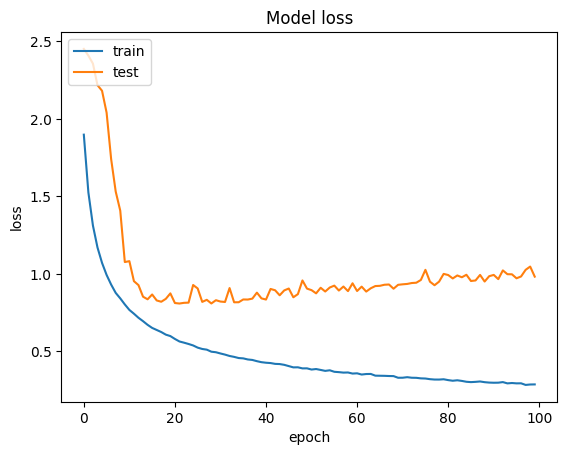

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
model.evaluate(x_test,y_test)
y_pred=model.predict(x_test)

375/375 [==============================] - 1s 2ms/step


In [12]:
y

array([[6],
       [9],
       [9],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [13]:
y_pred

array([[5.0191125e-06, 9.9896169e-01, 2.5662428e-07, ..., 1.1731564e-06,
        1.6821778e-05, 1.0131579e-03],
       [1.7922605e-06, 2.3267326e-06, 3.4872195e-04, ..., 2.5483178e-07,
        4.0687164e-06, 9.7609529e-07],
       [5.1327042e-05, 7.8210218e-07, 3.2826995e-03, ..., 2.9540348e-05,
        3.0465075e-04, 5.9771992e-06],
       ...,
       [9.5574733e-06, 9.9492443e-01, 9.7356246e-07, ..., 6.8721533e-07,
        8.1869857e-06, 5.0475933e-03],
       [4.0973593e-03, 1.1001855e-02, 1.7747726e-06, ..., 2.1488508e-03,
        5.1855189e-01, 4.6337783e-01],
       [1.8742114e-06, 4.9850491e-06, 8.1210351e-03, ..., 2.9156357e-02,
        4.4868651e-07, 1.4975222e-05]], dtype=float32)

In [14]:
y_pred=[np.argmax(y_pred[i]) for i in range(len(y_pred))]

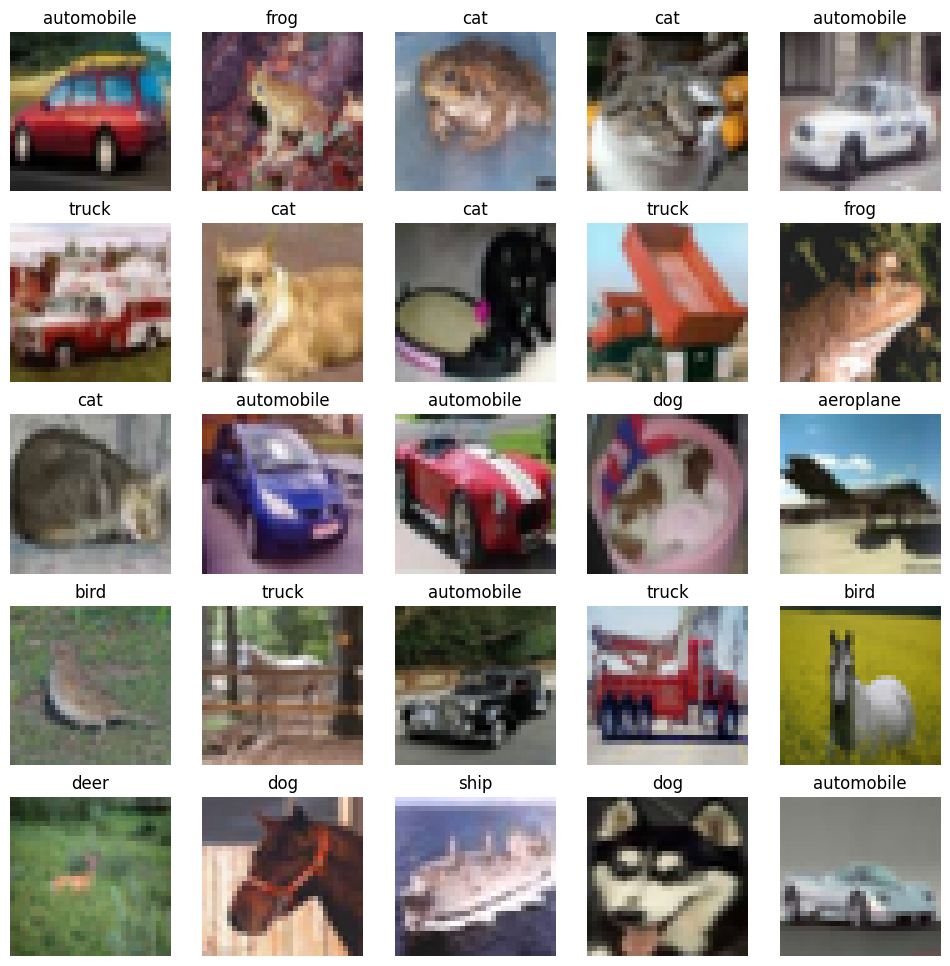

In [15]:
fig, ax = plt.subplots(5, 5,figsize=(12,12))
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_test[k], aspect='auto')
        ax[i][j].set_title(labels[y_pred[k]])
        ax[i][j].axis('off')
        k += 1
    print('\n')

plt.show()